In [92]:
import random

import pandas as pd
import numpy as np
import seaborn as sns

In [93]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Гипотезы и метрики

**Гипотеза:** списать можно у товарища по ходу экзамена.
   
**Метрики:**
1. Доля совпадающих ответов. Но если ответы правильные?
2. Доля совпадающих неправильных ответов.
  Отдельно можно сделать акцент на совпадающих редких неправильных ответах.

# Предобработка данных

In [94]:
exam = pd.read_csv('exam.csv')
user_answer = pd.read_csv('user_answer.csv')

In [95]:
exam

,id,start_date,tasks_cnt
0,1,2023-12-15 10:00:00,16
1,2,2023-12-20 10:00:00,4


In [96]:
user_answer

,exam_id,user_id,task_ind,answer,verdict,time
0,1,98,1,1,OK,2023-12-15 10-22-51
1,1,98,2,0,WA,2023-12-15 11-16-21
2,1,98,3,1,OK,2023-12-15 11-28-44
3,1,98,4,0,WA,2023-12-15 11-54-32
4,1,98,5,0,WA,2023-12-15 12-30-11
...,...,...,...,...,...,...
4355,2,210,4,3,WA,2023-12-20 11-11-24
4356,2,299,1,1,WA,2023-12-20 10-35-50
4357,2,299,2,0,OK,2023-12-20 10-37-59
4358,2,299,3,2,WA,2023-12-20 10-42-58


In [97]:
user_answer.isna().sum()

exam_id     0
user_id     0
task_ind    0
answer      0
verdict     0
time        0
dtype: int64

In [98]:
user_answer.dtypes

exam_id      int64
user_id      int64
task_ind     int64
answer       int64
verdict     object
time        object
dtype: object

In [99]:
user_answer['time'] = pd.to_datetime(
    user_answer['time'],
    format='%Y-%m-%d %H-%M-%S'
)

In [100]:
user_answer.dtypes

exam_id              int64
user_id              int64
task_ind             int64
answer               int64
verdict             object
time        datetime64[ns]
dtype: object

# Вычисление метрик

## Списывание у коллег

In [101]:
user_answer_exam_1 = user_answer[user_answer['exam_id'] == 1]

In [102]:
user_answer_exam_1

,exam_id,user_id,task_ind,answer,verdict,time
0,1,98,1,1,OK,2023-12-15 10:22:51
1,1,98,2,0,WA,2023-12-15 11:16:21
2,1,98,3,1,OK,2023-12-15 11:28:44
3,1,98,4,0,WA,2023-12-15 11:54:32
4,1,98,5,0,WA,2023-12-15 12:30:11
...,...,...,...,...,...,...
2235,1,89,12,3,OK,2023-12-15 10:03:36
2236,1,89,13,2,OK,2023-12-15 10:04:03
2237,1,89,14,0,OK,2023-12-15 10:04:04
2238,1,89,15,0,OK,2023-12-15 10:04:09


In [103]:
user_answer_exam_1['user_id'].nunique()

140

In [104]:
user_answer_exam_1 \
    .merge(user_answer_exam_1, on='task_ind', suffixes=('_1', '_2'))

,exam_id_1,user_id_1,task_ind,answer_1,verdict_1,time_1,exam_id_2,user_id_2,answer_2,verdict_2,time_2
0,1,98,1,1,OK,2023-12-15 10:22:51,1,98,1,OK,2023-12-15 10:22:51
1,1,98,1,1,OK,2023-12-15 10:22:51,1,49,1,OK,2023-12-15 10:52:48
2,1,98,1,1,OK,2023-12-15 10:22:51,1,94,1,OK,2023-12-15 10:06:50
3,1,98,1,1,OK,2023-12-15 10:22:51,1,118,1,OK,2023-12-15 10:10:38
4,1,98,1,1,OK,2023-12-15 10:22:51,1,34,0,WA,2023-12-15 11:21:17
...,...,...,...,...,...,...,...,...,...,...,...
313595,1,89,16,1,OK,2023-12-15 10:04:15,1,17,1,OK,2023-12-15 11:30:11
313596,1,89,16,1,OK,2023-12-15 10:04:15,1,137,1,OK,2023-12-15 10:50:08
313597,1,89,16,1,OK,2023-12-15 10:04:15,1,32,3,WA,2023-12-15 11:27:00
313598,1,89,16,1,OK,2023-12-15 10:04:15,1,102,1,OK,2023-12-15 10:09:15


In [105]:
user_to_user_data_exam_1 = user_answer_exam_1 \
    .merge(user_answer_exam_1, on='task_ind', suffixes=('_1', '_2'))

In [106]:
user_to_user_data_exam_1['key'] = \
    user_to_user_data_exam_1.apply(
        lambda x: (int(min(x['user_id_1'], x['user_id_2'])), int(max(x['user_id_1'], x['user_id_2']))), 
        axis=1
    )
user_to_user_data_exam_1

,exam_id_1,user_id_1,task_ind,answer_1,verdict_1,time_1,exam_id_2,user_id_2,answer_2,verdict_2,time_2,key
0,1,98,1,1,OK,2023-12-15 10:22:51,1,98,1,OK,2023-12-15 10:22:51,"(98, 98)"
1,1,98,1,1,OK,2023-12-15 10:22:51,1,49,1,OK,2023-12-15 10:52:48,"(49, 98)"
2,1,98,1,1,OK,2023-12-15 10:22:51,1,94,1,OK,2023-12-15 10:06:50,"(94, 98)"
3,1,98,1,1,OK,2023-12-15 10:22:51,1,118,1,OK,2023-12-15 10:10:38,"(98, 118)"
4,1,98,1,1,OK,2023-12-15 10:22:51,1,34,0,WA,2023-12-15 11:21:17,"(34, 98)"
...,...,...,...,...,...,...,...,...,...,...,...,...
313595,1,89,16,1,OK,2023-12-15 10:04:15,1,17,1,OK,2023-12-15 11:30:11,"(17, 89)"
313596,1,89,16,1,OK,2023-12-15 10:04:15,1,137,1,OK,2023-12-15 10:50:08,"(89, 137)"
313597,1,89,16,1,OK,2023-12-15 10:04:15,1,32,3,WA,2023-12-15 11:27:00,"(32, 89)"
313598,1,89,16,1,OK,2023-12-15 10:04:15,1,102,1,OK,2023-12-15 10:09:15,"(89, 102)"


In [107]:
user_to_user_data_exam_1 = user_to_user_data_exam_1 \
    [user_to_user_data_exam_1['user_id_1'] != user_to_user_data_exam_1['user_id_2']]
user_to_user_data_exam_1

,exam_id_1,user_id_1,task_ind,answer_1,verdict_1,time_1,exam_id_2,user_id_2,answer_2,verdict_2,time_2,key
1,1,98,1,1,OK,2023-12-15 10:22:51,1,49,1,OK,2023-12-15 10:52:48,"(49, 98)"
2,1,98,1,1,OK,2023-12-15 10:22:51,1,94,1,OK,2023-12-15 10:06:50,"(94, 98)"
3,1,98,1,1,OK,2023-12-15 10:22:51,1,118,1,OK,2023-12-15 10:10:38,"(98, 118)"
4,1,98,1,1,OK,2023-12-15 10:22:51,1,34,0,WA,2023-12-15 11:21:17,"(34, 98)"
5,1,98,1,1,OK,2023-12-15 10:22:51,1,140,0,WA,2023-12-15 10:23:46,"(98, 140)"
...,...,...,...,...,...,...,...,...,...,...,...,...
313594,1,89,16,1,OK,2023-12-15 10:04:15,1,29,1,OK,2023-12-15 11:25:33,"(29, 89)"
313595,1,89,16,1,OK,2023-12-15 10:04:15,1,17,1,OK,2023-12-15 11:30:11,"(17, 89)"
313596,1,89,16,1,OK,2023-12-15 10:04:15,1,137,1,OK,2023-12-15 10:50:08,"(89, 137)"
313597,1,89,16,1,OK,2023-12-15 10:04:15,1,32,3,WA,2023-12-15 11:27:00,"(32, 89)"


In [108]:
len(user_to_user_data_exam_1)

311360

In [109]:
user_to_user_data_exam_1

,exam_id_1,user_id_1,task_ind,answer_1,verdict_1,time_1,exam_id_2,user_id_2,answer_2,verdict_2,time_2,key
1,1,98,1,1,OK,2023-12-15 10:22:51,1,49,1,OK,2023-12-15 10:52:48,"(49, 98)"
2,1,98,1,1,OK,2023-12-15 10:22:51,1,94,1,OK,2023-12-15 10:06:50,"(94, 98)"
3,1,98,1,1,OK,2023-12-15 10:22:51,1,118,1,OK,2023-12-15 10:10:38,"(98, 118)"
4,1,98,1,1,OK,2023-12-15 10:22:51,1,34,0,WA,2023-12-15 11:21:17,"(34, 98)"
5,1,98,1,1,OK,2023-12-15 10:22:51,1,140,0,WA,2023-12-15 10:23:46,"(98, 140)"
...,...,...,...,...,...,...,...,...,...,...,...,...
313594,1,89,16,1,OK,2023-12-15 10:04:15,1,29,1,OK,2023-12-15 11:25:33,"(29, 89)"
313595,1,89,16,1,OK,2023-12-15 10:04:15,1,17,1,OK,2023-12-15 11:30:11,"(17, 89)"
313596,1,89,16,1,OK,2023-12-15 10:04:15,1,137,1,OK,2023-12-15 10:50:08,"(89, 137)"
313597,1,89,16,1,OK,2023-12-15 10:04:15,1,32,3,WA,2023-12-15 11:27:00,"(32, 89)"


In [110]:
user_to_user_data_exam_1 = user_to_user_data_exam_1[
    user_to_user_data_exam_1['answer_1'] == user_to_user_data_exam_1['answer_2']
]

In [111]:
user_to_user_data_exam_1 # получили датафрейм где для каждого юзера, остались юзеры, у которых совпадает ответ на конкретную задачу

,exam_id_1,user_id_1,task_ind,answer_1,verdict_1,time_1,exam_id_2,user_id_2,answer_2,verdict_2,time_2,key
1,1,98,1,1,OK,2023-12-15 10:22:51,1,49,1,OK,2023-12-15 10:52:48,"(49, 98)"
2,1,98,1,1,OK,2023-12-15 10:22:51,1,94,1,OK,2023-12-15 10:06:50,"(94, 98)"
3,1,98,1,1,OK,2023-12-15 10:22:51,1,118,1,OK,2023-12-15 10:10:38,"(98, 118)"
7,1,98,1,1,OK,2023-12-15 10:22:51,1,114,1,OK,2023-12-15 10:15:57,"(98, 114)"
14,1,98,1,1,OK,2023-12-15 10:22:51,1,4,1,OK,2023-12-15 10:09:07,"(4, 98)"
...,...,...,...,...,...,...,...,...,...,...,...,...
313593,1,89,16,1,OK,2023-12-15 10:04:15,1,77,1,OK,2023-12-15 10:18:51,"(77, 89)"
313594,1,89,16,1,OK,2023-12-15 10:04:15,1,29,1,OK,2023-12-15 11:25:33,"(29, 89)"
313595,1,89,16,1,OK,2023-12-15 10:04:15,1,17,1,OK,2023-12-15 11:30:11,"(17, 89)"
313596,1,89,16,1,OK,2023-12-15 10:04:15,1,137,1,OK,2023-12-15 10:50:08,"(89, 137)"


In [112]:
exam

,id,start_date,tasks_cnt
0,1,2023-12-15 10:00:00,16
1,2,2023-12-20 10:00:00,4


In [113]:
user_similarity_frac = user_to_user_data_exam_1 \
    .groupby(['user_id_1', 'user_id_2'], as_index=False) \
    .agg({'verdict_1': lambda x: len(x) / 16}) \
    .rename(columns={'verdict_1': 'similarity'})

In [114]:
user_similarity_frac #получили датафрейм, где указана доля схожести ответов

,user_id_1,user_id_2,similarity
0,1,2,0.5625
1,1,3,0.5000
2,1,4,0.2500
3,1,5,0.5625
4,1,6,0.3125
...,...,...,...
19219,140,135,0.7500
19220,140,136,0.6250
19221,140,137,0.0625
19222,140,138,0.6250


<Axes: xlabel='similarity', ylabel='Count'>

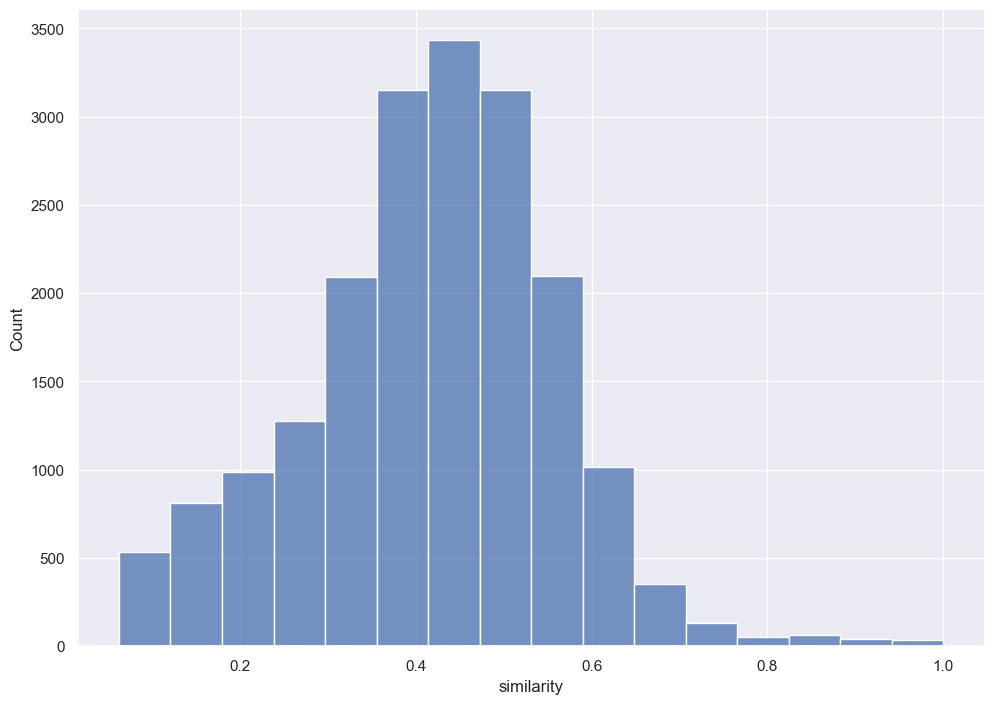

In [115]:
sns.histplot(user_similarity_frac['similarity'], bins=16) # график распределения сходства

In [118]:
user_similarity_frac['similarity'] \
    .value_counts() \
    .sort_index()
# кол-во значений similarity

similarity
0.0625     532
0.1250     812
0.1875     986
0.2500    1274
0.3125    2094
0.3750    3152
0.4375    3436
0.5000    3152
0.5625    2096
0.6250    1016
0.6875     350
0.7500     134
0.8125      50
0.8750      62
0.9375      42
1.0000      36
Name: count, dtype: int64

In [119]:
user_similarity_frac \
    .groupby('user_id_1', as_index=False) \
    .agg({'similarity': 'max'}) \
    ['similarity'].value_counts().sort_index()
#получим макс схожесть ответов для каждого ученика, и самого ученика 

similarity
0.5625     3
0.6250    11
0.6875    30
0.7500    33
0.8125    11
0.8750    10
0.9375    17
1.0000    25
Name: count, dtype: int64

<Axes: xlabel='similarity', ylabel='Count'>

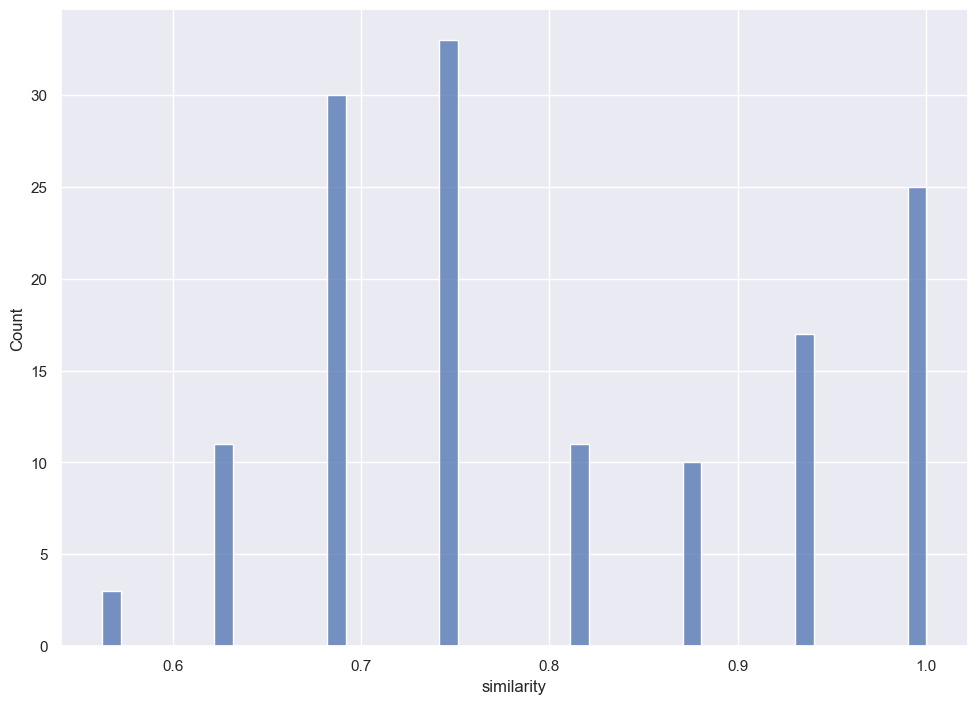

In [120]:
sns.histplot(user_similarity_frac \
    .groupby('user_id_1', as_index=False) \
    .agg({'similarity': 'max'}) \
    ['similarity'], binwidth=0.01)

In [121]:
suspicious_users_exam_1 = user_similarity_frac[user_similarity_frac['similarity'] >= 0.85].copy(deep=True)

In [122]:
suspicious_users_exam_1

,user_id_1,user_id_2,similarity
37,1,39,1.0000
129,1,131,1.0000
221,2,84,1.0000
1125,9,19,0.9375
1161,9,55,0.9375
...,...,...,...
18692,137,17,0.8750
18715,137,41,0.8750
18750,137,77,0.8750
18762,137,89,0.8750


In [123]:
suspicious_users_exam_1.user_id_1.nunique() # кол-во подзрительных на списывание людей 

52

In [124]:
user_success_df = user_answer_exam_1[
    user_answer_exam_1['user_id'].isin(suspicious_users_exam_1['user_id_1'])] \
    .groupby('user_id', as_index=False) \
    .agg({'verdict': lambda x: (x == 'OK').sum() / len(x)}) \
    .rename(columns={'verdict': 'success_rate'})

In [125]:
user_success_df # доля правильных ответов, 

,user_id,success_rate
0,1,0.1875
1,2,0.1250
2,9,0.1875
3,10,0.0625
4,13,0.0000
5,17,1.0000
6,19,0.1875
7,20,0.2500
8,21,0.2500
9,26,0.1250


In [126]:
user_success_df['success_rate'].value_counts().sort_index()

success_rate
0.0000     7
0.0625     8
0.1250     6
0.1875    11
0.2500     6
0.3125     4
0.3750     1
0.8125     1
0.8750     4
1.0000     4
Name: count, dtype: int64

In [127]:
user_success_df = user_answer_exam_1[user_answer_exam_1['user_id'].isin(suspicious_users_exam_1.user_id_1)] \
    .groupby('user_id', as_index=False) \
    .agg({'verdict': lambda x: (x == 'OK').sum() / len(x)}) \
    .rename(columns={'verdict': 'success_rate'})
successful_users = frozenset(user_success_df[user_success_df['success_rate'] >= 0.85]['user_id'])
#ученики, у которых большой процент совпадения, а так же правильных ответов, считаются неподозрительными

In [128]:
suspicious_users_exam_1[suspicious_users_exam_1['user_id_1'].isin(
    user_success_df[user_success_df['success_rate'] < 0.85]['user_id']
)]

,user_id_1,user_id_2,similarity
37,1,39,1.0000
129,1,131,1.0000
221,2,84,1.0000
1125,9,19,0.9375
1161,9,55,0.9375
...,...,...,...
17895,131,39,1.0000
18099,132,110,0.9375
18109,132,120,0.9375
18461,135,56,0.8750


In [129]:
res_df = suspicious_users_exam_1[suspicious_users_exam_1['user_id_1'].isin(
    user_success_df[user_success_df['success_rate'] < 0.85]['user_id']
)]

In [130]:
result=res_df.user_id_1.unique()
result #подозрительные на списывание люди

array([  1,   2,   9,  10,  13,  19,  20,  21,  26,  36,  39,  40,  53,
        54,  55,  56,  57,  58,  61,  68,  72,  78,  79,  80,  84,  86,
        90,  94,  96, 102, 104, 105, 110, 111, 115, 116, 120, 123, 129,
       130, 131, 132, 135, 136])

In [131]:
len(result)

44